In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torchinfo import summary
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time
import TrainingPresets as TP

In [2]:
import model_v01b3 as mymodel

In [3]:
torch.cuda.get_device_name(0)
m1 = mymodel.MyModel().to(torch.device("cuda:1"))
summary(m1, input_size=(2, 90, 100))

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1, 3]                    --
├─MyEncoder: 1-1                         [1, 86, 128]              --
│    └─MyEncodeCNN: 2-1                  --                        3,445,504
│    │    └─Sequential: 3-1              [1, 16, 30, 98]           160
│    │    └─Sequential: 3-2              [1, 32, 26, 94]           12,832
│    │    └─Sequential: 3-3              [1, 64, 22, 90]           51,264
│    │    └─Sequential: 3-4              [1, 128, 18, 86]          204,928
│    └─MyEncodeCNN: 2-2                  --                        3,445,504
│    │    └─Sequential: 3-5              [1, 16, 30, 98]           160
│    │    └─Sequential: 3-6              [1, 32, 26, 94]           12,832
│    │    └─Sequential: 3-7              [1, 64, 22, 90]           51,264
│    │    └─Sequential: 3-8              [1, 128, 18, 86]          204,928
│    └─MyEncodeLSTM: 2-3                 --

In [4]:
datadir = '../Dataset/0302make00/'
print(os.listdir(datadir))

['sid.npy', 'csi.npy']


In [5]:
mydata = TP.MyDataset(datadir + 'csi.npy', datadir + 'sid.npy')
print(mydata.data['x'].shape, mydata.data['y'].shape)

train_size = int(len(mydata) * 0.7)
valid_size = int(len(mydata) * 0.2)
test_size = int(len(mydata)) - train_size - valid_size
print(train_size, valid_size, test_size)

train_loader, valid_loader, test_loader = TP.split_loader(mydata, train_size, valid_size, test_size, 8)

loaded
(3000, 2, 100, 90) (3000,)
2100 600 300
2100 600 300


In [6]:
# Hyperparameters
args = TP.MyArgs(cuda=1, epochs=100, learning_rate=0.001, criterion=nn.CrossEntropyLoss())

In [11]:
# Model and Loss
model = mymodel.MyModel().to(args.device)
optimizer = torch.optim.Adam

trainer = TP.Trainer(model, args, 
                     train_loader, valid_loader, test_loader, optimizer)

In [ ]:
args = TP.MyArgs(cuda=1, epochs=100, learning_rate=0.001, criterion=nn.CrossEntropyLoss())
trainer.args = args

In [12]:
# Training and Saving
trainer.train_and_eval()

epoch=68/100,131/262of train, loss=0.43321329355239877

KeyboardInterrupt: 

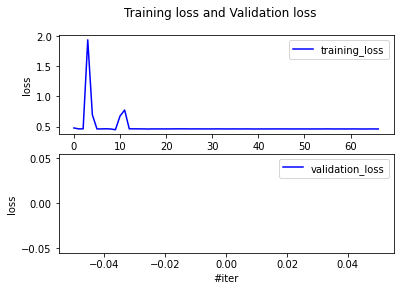

In [13]:
# Plot loss curves
%matplotlib inline
trainer.plot_loss()

In [14]:
  #=====================test============================
trainer.test()

AttributeError: module 'torch' has no attribute 'y_type'

Text(30.5, 0.5, 'true')

<Figure size 432x288 with 0 Axes>

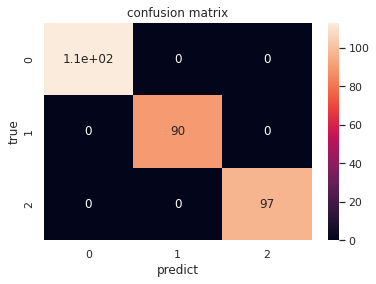

In [23]:
%matplotlib inline

def fromonehot(inlist):
    out = []
    for item in inlist:
        if np.argmax(item) == 0:
            out.append(0)
        elif np.argmax(item) == 1:
            out.append(1)
        elif np.argmax(item) == 2:
            out.append(2)
    return out

trainer.plot_test_results()